In [1]:
using Graphs
using LinearAlgebra

using DifferentialEquations

using DrWatson
quickactivate(@__DIR__)

using PolarizationFramework

file = datadir("highschool13", "Highschool13-class2BIO1.lg")
g = loadgraph(file)
A = adjacency_matrix(g)

36×36 SparseArrays.SparseMatrixCSC{Int64, Int64} with 804 stored entries:
⢪⡲⠏⣟⣿⣿⢿⢓⠅⡟⣗⡇⡫⡽⠢⣿⢫⢛
⣯⢥⠎⠁⣐⣼⣿⢯⡇⢾⢭⡄⠟⠾⠿⡯⠿⢿
⣿⣿⣐⣼⣮⡻⣿⣿⡍⣿⣺⡇⣆⣈⣀⣘⣘⣘
⢿⢓⡿⣟⣿⣿⢮⡳⡇⣷⢽⡇⣝⠩⠬⣹⠠⡭
⣥⠥⣩⣍⣧⣭⢭⣭⣄⡹⣩⡅⣭⡍⠭⣬⢥⣩
⠽⠽⠃⠷⠾⠾⠷⠷⠇⠾⡮⠋⡗⠑⠘⠚⠿⡷
⣏⡮⣻⡅⡈⢹⡗⡙⡇⠿⢝⠉⢮⡳⣢⣗⡏⣿
⣬⣦⡿⡧⣀⢸⣆⣣⡃⣧⣲⠀⢬⢾⢤⠓⣞⣿
⣯⢒⣿⣇⣒⢸⡄⡦⡅⣳⢿⡧⣯⣭⣾⣽⣮⡻

In [2]:
triads = get_triads(A)
links = get_links_in_triads(triads)
A2 = get_adj_necessary_links(size(A)[1], links; typ = Float64)

link_indices = findall(triu(A2, 1)[:] .> 0)

sum(A)/2, sum(A2), length(links), length(triads)

(402.0, 402.0, 402, 2268)

In [3]:
n = size(A2)[1]
attr = BinaryAttributes(3)

gamma = 0.0001
maxtime = 1000.
ode_fun = Heider72!
solver = PolarizationFramework.AutoTsit5(PolarizationFramework.Rodas5(autodiff = false))
show_plot = false

(ishb_sim_par, solend, solu, u0, xy_attr, sol) = 
    calc_heider_attr(n, attr, gamma, maxtime, ode_fun, solver, show_plot;
    all_links_mat = A2);
    
ishb_sim_par, solend, maximum(abs.(solu .- u0)), sum(abs.(solu) .> 1-100*eps())

(Any[true, false, 0.00975609756097561, 0.9999835313959506, false, false, [572.0, 0.0, 1696.0, 0.0], true, 0.7477954144620811, true], 117.47130885491828, 1.9950433282070712, 400)

In [11]:
#continuation, if needed

# gamma = 0.000
maxtime = 10000.
ode_fun = Heider72!
solver = PolarizationFramework.AutoTsit5(PolarizationFramework.Rodas5(autodiff = false))
show_plot = false

(ishb_sim_par, solend, solu, u0, xy_attr, sol) = 
    calc_heider_attr(n, attr, gamma, maxtime, ode_fun, solver, show_plot, solu, xy_attr;
    all_links_mat = A2);

ishb_sim_par, solend, maximum(abs.(solu .- u0)), sum(abs.(solu) .> 1-100*eps())

(Any[false, false, -0.13861386138613863, 0.9792768959435626, false, false, [543.0, 21.0, 1678.0, 26.0], false, 0.7513227513227513, false], 10000.0, 0.0, 402)

In [29]:
0 .< abs.(u0) .< 0.99;

In [135]:
solu2 = copy(solu)
solu2[abs.(solu2) .> 1-100*eps()] .= (1-100*eps()) .* sign.(solu2[abs.(solu2) .> 1-100*eps()]);

In [143]:
# solu2 = copy(solu)
solu2[abs.(solu2) .> 1-100*eps()] .= (1-100*eps()) .* sign.(solu2[abs.(solu2) .> 1-100*eps()]);

In [144]:
#continuation, if needed

# gamma = 0.000
maxtime = 10000.
ode_fun = Heider72!
solver = PolarizationFramework.AutoTsit5(PolarizationFramework.Rodas5(autodiff = false))
show_plot = false

(ishb_sim_par, solend, solu2, u02, xy_attr, sol2) = 
    calc_heider_attr(n, attr, gamma, maxtime, ode_fun, solver, show_plot, solu2, xy_attr;
    all_links_mat = A2);

ishb_sim_par, solend, maximum(abs.(solu2 .- u02)), sum(abs.(solu2) .> 1-100*eps())

(Any[false, false, -0.10975609756097561, 0.9251824817518246, false, false, [221.0, 62.0, 793.0, 20.0], false, 0.7417883211678832, false], 10000.0, 3.5272340603853536e-12, 331)

In [7]:
#using other fun

# gamma = 0.005
maxtime = 10000.
ode_fun = Heider722!
solver = PolarizationFramework.AutoTsit5(PolarizationFramework.Rodas5(autodiff = false))
show_plot = false

(ishb_sim_par, solend, solu72, u072, xy_attr, sol) = 
    calc_heider_attr(n, attr, gamma, maxtime, ode_fun, solver, show_plot, u0, xy_attr;
    all_links_mat = A2);

ishb_sim_par, solend, maximum(abs.(solu72 .- u072)), sum(abs.(solu72) .> 1-100*eps())

(Any[true, false, 0.0851063829787234, 0.9999798413993252, false, false, [337.0, 0.0, 759.0, 0.0], true, 0.6925182481751825, true], 85.58907363048189, 1.9960419278646362, 0)

In [8]:
maximum(abs.(solu72 .- solu))

0.0007811315699992605

In [149]:
#using other fun
# continue

gamma = 0.000
maxtime = 10000.
ode_fun = Heider722!
solver = PolarizationFramework.AutoTsit5(PolarizationFramework.Rodas5(autodiff = false))
show_plot = false

(ishb_sim_par, solend, solu72, u072, xy_attr, sol) = 
    calc_heider_attr(n, attr, gamma, maxtime, ode_fun, solver, show_plot, solu72, xy_attr;
    all_links_mat = A2);

ishb_sim_par, solend, maximum(abs.(solu72 .- u072)), sum(abs.(solu72) .> 1-100*eps())

(Any[false, false, -0.10975609756097561, 0.9251824804762774, false, false, [221.0, 62.0, 793.0, 20.0], false, 0.7417883211678832, false], 10000.0, 4.5707282403384397e-10, 0)

In [119]:
inds = [16,19]
solu72[inds...], dx[inds...]
# triads[17]
triads_around_links_dict[inds...]

8-element Vector{Vector{Tuple{Int64, Int64}}}:
 [(3, 16), (3, 19)]
 [(7, 16), (7, 19)]
 [(8, 16), (8, 19)]
 [(10, 16), (10, 19)]
 [(12, 16), (12, 19)]
 [(16, 35), (19, 35)]
 [(16, 36), (19, 36)]
 [(16, 38), (19, 38)]

In [120]:
sss = 0.
for pair in triads_around_links_dict[inds...]
    println(x[pair[1]...], " ", x[pair[2]...] )
    sss += x[pair[1]...] * x[pair[2]...] 
end
println((sss / 8 + xy_attr[inds...]*gamma) * (1. - x[inds...]^2) )

0.999999999 -0.999999999
0.999999999 0.999999999
0.999999999 -0.999999999
-0.999999999 0.999999999
-0.999999999 0.999999999
-0.999999999 -0.999999999
0.999999999 0.999999999
-0.999999999 -0.999999999
-5.551114966129525e-26


In [89]:
xy_attr[inds...]*gamma

0.0

In [78]:
gamma

0.0001

In [57]:
solu72[3,8], x[8,9]

(-0.999999999, -0.999999999)

In [96]:
for (ti, triad) in enumerate(triads)
    i, j, k = triad
    if  prod((x[i,j], x[i,k], x[j,k])) < 0
        print(x[i,j], x[i,k], x[j,k])
        println(triad)
        println(ti)
        print("\n")
    end
end

0.999999999-0.9999999990.999999999(1, 7, 9)
40

0.999999999-0.9999999990.999999999(1, 7, 11)
42

0.999999999-0.9999999990.999999999(1, 7, 13)
44

0.999999999-0.9999999990.999999999(1, 7, 16)
45

0.999999999-0.9999999990.999999999(2, 7, 11)
130

-0.999999999-0.999999999-0.999999999(2, 11, 29)
162

-0.9999999990.9999999990.999999999(3, 7, 9)
254

-0.9999999990.9999999990.999999999(3, 7, 11)
256

-0.9999999990.9999999990.999999999(3, 7, 16)
258

-0.999999999-0.9999969245579095-0.999999999(3, 7, 34)
263

-0.9999999990.99999999898985210.999999999(3, 7, 37)
266

0.9999999990.999999999-0.999999999(3, 9, 32)
285

0.9999999990.999999999-0.999999999(3, 9, 35)
287

0.999999999-0.9999999990.999999999(3, 9, 36)
288

0.9999999990.999999999-0.999999999(3, 11, 35)
308

0.999999999-0.9999999990.999999999(3, 11, 36)
309

0.999999999-0.9999999990.999999999(3, 16, 19)
332

0.9999999990.999999999-0.999999999(3, 16, 35)
334

0.999999999-0.9999999990.999999999(3, 16, 36)
335

-0.99999692455790950.9999999990.

In [12]:
solu[1,2]+1

2.220446049250313e-16

In [108]:
# so it happens there might be jammed states or states that cannot get out from unbalanced state due to numerical reasons.
# Let's check it

x = sol[1].*A2
x = sol[end] .* A2
dx = similar(x)
xs = sign.(Symmetric(x))

dx = similar(x)
lay1mul = zeros(n, n)
x_sim = zeros(n, n)

mask = triu(trues(size(u0)), 1)
mask .*= A2

triads_around_links_dict = PolarizationFramework.get_triangles_around_links(triads)
counts = PolarizationFramework.link_triangles_count(triads_around_links_dict; links = links)
triads_count_mat = PolarizationFramework.link_triangles_mat(n, links, counts)
triads_count_mat_inv = PolarizationFramework.link_triangles_mat_inv(n, links, counts)

link_indices = findall(triu(A2, 1)[:] .> 0)

p1 = (n, gamma .* xy_attr, lay1mul, x_sim, mask, triads_count_mat_inv)
p2 = (n, gamma .* xy_attr .* triads_count_mat, lay1mul, x_sim, mask)
p3 = (p1..., zeros(Bool, n,n))

# Heider72!(dx, x, p1, 0)
Heider722!(dx, x, p3, 0)

fc = (dx.*x)[mask] .> 0
all(fc)

#it should have been obvious it is numerical, because of reaching max time. 

false

In [114]:
fc2 = (dx .* x) .> 0
findall(.!(fc))

3-element Vector{Int64}:
 109
 236
 270

In [117]:
links[109]

(16, 19)

In [92]:
all(abs.(x)[mask] .> 0)

true

In [13]:
using BenchmarkTools


In [10]:
x = sol[1].*A2
xs = sign.(Symmetric(x))

dx = similar(x)
lay1mul = zeros(n, n)
x_sim = zeros(n, n)

mask = triu(trues(size(u0)), 1)
mask .*= A2

triads_around_links_dict = PolarizationFramework.get_triangles_around_links(triads)
counts = PolarizationFramework.link_triangles_count(triads_around_links_dict; links = links)
triads_count_mat = PolarizationFramework.link_triangles_mat(n, links, counts)
triads_count_mat_inv = PolarizationFramework.link_triangles_mat_inv(n, links, counts)

link_indices = findall(triu(A2, 1)[:] .> 0)

p1 = (n, gamma .* xy_attr, lay1mul, x_sim, mask, triads_count_mat_inv)
p2 = (n, gamma .* xy_attr .* triads_count_mat, lay1mul, x_sim, mask)

DimensionMismatch: DimensionMismatch("arrays could not be broadcast to a common size; got a dimension with lengths 336 and 43")

In [8]:
condition_here(u, t, integrator) = condition2(u, t, integrator, mask)
affect!(integrator) = terminate!(integrator)
cb = DiscreteCallback(condition_here, affect!)

#ode and model parameters
tspan = (0.0, maxtime)

prob72 = ODEProblem(Heider72!, sol[1], tspan, p1)
sol = solve(
        prob72,
        solver,
        reltol = 1e-6,
        abstol = 1e-12,
        callback = cb,
        isoutofdomain = (u, p, t) -> any(x -> abs.(x) >= 1, u),
        save_everystep = false,
    )

retcode: Terminated
Interpolation: 1st order linear
t: 3-element Vector{Float64}:
   0.0
 169.75348330281628
 169.75348330281628
u: 3-element Vector{Matrix{Float64}}:
 [0.0 -0.6435115410118746 … -0.0 -0.0; 0.0 0.0 … -0.0 -0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 -0.9999999999999999 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 -0.9999999999999999 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

In [6]:
u0_inc = sol[1];
link_indices = findall(triu(A2,1)[:] .> 0)
u0 = zeros(n,n)
u0[link_indices] = sol[1]
u0;

In [9]:
n

43

In [12]:
reps = 10
difs = zeros(reps)
difs2 = zeros(reps)

maxtime = 1000.

for i = 1:reps
    u0 = triu((rand(n, n) * 2) .- 1, 1)
    val0_attr = get_attributes(attr, n)
    xy_attr = get_attribute_layer_weights(attr, val0_attr)

    (ishb_sim_par72, solend, solu72, u0, xy_attr, sol72) = 
        calc_heider_attr(n, attr, gamma, maxtime, Heider72!, solver, false, u0, xy_attr;
        all_links_mat = A2);
    
    if !ishb_sim_par72[1]
        print("c")
        i -= 1
        continue
    end

    (ishb_sim_par72, solend, solu722, u0, xy_attr, sol722) = 
        calc_heider_attr(n, attr, gamma, maxtime, Heider722!, solver, false, u0, xy_attr;
        all_links_mat = A2);
    difs2[i] = maximum(abs.(solu72 .- solu722))

    # u0 = u0[link_indices]

    (ishb_sim_par9, solend, solu9, u0, xy_attr, sol) = 
        calc_heider_attr(n, attr, gamma, maxtime, Heider92!, solver, false, u0, xy_attr;
        all_links_mat = A2);
    # println(ishb_sim_par72[7] == ishb_sim_par9[7])
    difs[i] = maximum(abs.(solu72[link_indices] .- solu9))
    # println()

    # println(ishb_sim_par9 == ishb_sim_par72)
end
difs, difs2

cc

([0.000685653495302585, 0.0013560740244330516, 0.0, 0.0020734374524702393, 0.002062813328068569, 0.000621308306474555, 0.0, 0.00253693114344844, 0.0015750387356212592, 0.0005076508016619297], [0.0004490042687851359, 0.0029964210830188964, 0.0, 0.003740693770792669, 0.0023179972922087178, 0.0015473054426984323, 0.0, 0.0018322722549158899, 0.0015760413079872748, 0.00253675679750176])

In [13]:
all_triads = get_triads(A2);

#Heider72!
all_links = get_links_in_triads(all_triads)
triads_around_links_dict = get_triangles_around_links(all_triads)
counts = link_triangles_count(triads_around_links_dict; links = all_links)
triads_count_mat = PolarizationFramework.link_triangles_mat_inv(n, all_links, counts)

# Heider9!
link_indices = findall(triu(A2,1)[:] .> 0) 
nl = length(link_indices)

link_pairs = get_triangles_around_links(triads_around_links_dict, all_links)
link_pairs_triad_cnt = [length(link) for link in link_pairs];

In [15]:
u0 = triu((rand(n, n) * 2) .- 1, 1)
val0_attr = get_attributes(attr, n)
xy_attr = get_attribute_layer_weights(attr, val0_attr)

maxtime = 1000.

@benchmark calc_heider_attr(n, attr, gamma, maxtime, Heider72!, solver, false, u0, xy_attr; all_links_mat = A2, all_triads = all_triads, triads_count_mat = triads_count_mat, link_indices = link_indices, link_pairs = link_pairs, link_pairs_triad_cnt = link_pairs_triad_cnt)


BenchmarkTools.Trial: 94 samples with 1 evaluation.
 Range (min … max):  48.998 ms … 70.014 ms  ┊ GC (min … max): 0.00% … 3.16%
 Time  (median):     53.261 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   53.601 ms ±  3.041 ms  ┊ GC (mean ± σ):  1.08% ± 1.91%

       ▃            ▄█    ▄   ▁       ▁                        
  ▇▄▄▇▄█▆▆▁▄▄▆▇▆▆▇▄▇██▇▇▆▇█▆▆▁█▄▆▆▁▇▁▁█▁▁▆▁▄▁▄▁▁▁▄▁▁▁▁▁▁▁▁▁▁▄ ▁
  49 ms           Histogram: frequency by time          62 ms <

 Memory estimate: 31.23 MiB, allocs estimate: 13788.

In [16]:
@benchmark calc_heider_attr(n, attr, gamma, maxtime, Heider9!, solver, false, u0, xy_attr; all_links_mat = A2, all_triads = all_triads, triads_count_mat = triads_count_mat, link_indices = link_indices, link_pairs = link_pairs, link_pairs_triad_cnt = link_pairs_triad_cnt)


BenchmarkTools.Trial: 35 samples with 1 evaluation.
 Range (min … max):  135.263 ms … 158.541 ms  ┊ GC (min … max): 10.46% … 12.40%
 Time  (median):     142.924 ms               ┊ GC (median):    13.85%
 Time  (mean ± σ):   144.216 ms ±   6.477 ms  ┊ GC (mean ± σ):  13.29% ±  2.08%

   █  ▃             █▃█                             ▃            
  ▇█▁▁█▇▁▇▁▁▁▇▇▁▇▇▁▁███▇▁▇▇▁▇▁▁▁▁▇▁▇▇▁▁▇▁▁▁▇▁▁▇▇▁▁▁▁█▁▁▁▁▁▁▁▁▇▇ ▁
  135 ms           Histogram: frequency by time          159 ms <

 Memory estimate: 318.63 MiB, allocs estimate: 1450456.

In [17]:
@benchmark calc_heider_attr(n, attr, gamma, maxtime, Heider92!, solver, false, u0, xy_attr; all_links_mat = A2, all_triads = all_triads, triads_count_mat = triads_count_mat, link_indices = link_indices, link_pairs = link_pairs, link_pairs_triad_cnt = link_pairs_triad_cnt)


BenchmarkTools.Trial: 107 samples with 1 evaluation.
 Range (min … max):  37.561 ms … 58.049 ms  ┊ GC (min … max):  0.00% … 14.53%
 Time  (median):     46.579 ms              ┊ GC (median):    13.37%
 Time  (mean ± σ):   46.952 ms ±  2.845 ms  ┊ GC (mean ± σ):  13.16% ±  2.30%

                          ▄    █▃   ▂                          
  ▃▁▁▁▁▃▁▁▁▁▃▁▁▁▁▁▁▁▁▁▁▁▁▅█▇▇▅▃██▅▇▇██▆▅▆▃▃▁▄▃▄▃▃▃▄▁▃▃▁▃▃▃▃▁▃ ▃
  37.6 ms         Histogram: frequency by time        54.1 ms <

 Memory estimate: 104.19 MiB, allocs estimate: 449491.

In [18]:
@benchmark calc_heider_attr(n, attr, gamma, maxtime, Heider722!, solver, false, u0, xy_attr; all_links_mat = A2, all_triads = all_triads, triads_count_mat = triads_count_mat, link_indices = link_indices, link_pairs = link_pairs, link_pairs_triad_cnt = link_pairs_triad_cnt)


BenchmarkTools.Trial: 232 samples with 1 evaluation.
 Range (min … max):  18.147 ms … 32.996 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     21.134 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   21.627 ms ±  2.745 ms  ┊ GC (mean ± σ):  3.92% ± 6.45%

   ▄█▇▂      ▁▂                  ▁                             
  ▄█████▅█▄▁▅██▇▅██▄▅▇▄▄▇▃▁▄█▇▇█▅█▆▄▄▃▁▄▃▃▃▄▁▄▃▁▁▄▄▁▄▁▁▁▁▁▁▁▃ ▄
  18.1 ms         Histogram: frequency by time        29.8 ms <

 Memory estimate: 31.50 MiB, allocs estimate: 16332.

In [27]:
sum([7 in triad for triad in triads])

3

In [22]:
triangles(g)[[6,7,17,27,30,34,29,32]]

8-element Vector{Int64}:
  3
  3
  1
  1
  4
 15
  1
  3

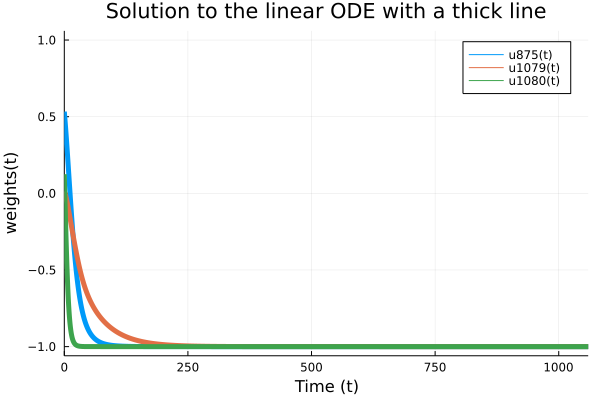

In [110]:
mask2 = zeros(Bool, size(mask))
mask2[25,26] = 1
mask2[25,32] = 1
mask2[26,32] = 1

h = plot(
            sol,
            linewidth = 5,
            title = "Solution to the linear ODE with a thick line",
            xaxis = "Time (t)",
            yaxis = "weights(t)",
            ylim = [-1, +1],
            vars = reshape(1:n^2, n, n)[mask2],
        )

In [98]:
reshape(1:n^2, n, n)[mask2]

LoadError: BoundsError: attempt to access 34×34 reshape(::UnitRange{Int64}, 34, 34) with eltype Int64 at index [[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]]

In [10]:
using LinearAlgebra
triangles(Graph(Symmetric(A2)))

34-element Vector{Int64}:
 18
 12
 11
 10
  2
  3
  3
  6
  5
  0
  2
  0
  1
  ⋮
  1
  4
  1
  1
  1
  1
  1
  4
  3
  3
 13
 15

## Testing counting destabilized links

In [33]:
larger_size = 20
rl_weights = init_random_balanced_relations(n, larger_size)

rl_weights2 = A2 .* rl_weights

36×36 Matrix{Float64}:
 0.0  0.99  0.0   0.0   0.99  0.99  …  -0.99  -0.99  -0.99  -0.99  -0.99
 0.0  0.0   0.99  0.99  0.99  0.0      -0.99  -0.99  -0.0   -0.99  -0.99
 0.0  0.0   0.0   0.99  0.99  0.0      -0.99  -0.0   -0.99  -0.0   -0.0
 0.0  0.0   0.0   0.0   0.0   0.0      -0.99  -0.0   -0.99  -0.0   -0.99
 0.0  0.0   0.0   0.0   0.0   0.99     -0.99  -0.99  -0.99  -0.99  -0.99
 0.0  0.0   0.0   0.0   0.0   0.0   …  -0.0   -0.99  -0.99  -0.99  -0.99
 0.0  0.0   0.0   0.0   0.0   0.0      -0.99  -0.99  -0.99  -0.99  -0.99
 0.0  0.0   0.0   0.0   0.0   0.0      -0.0   -0.0   -0.0   -0.0   -0.99
 0.0  0.0   0.0   0.0   0.0   0.0      -0.99  -0.0   -0.99  -0.0   -0.99
 0.0  0.0   0.0   0.0   0.0   0.0      -0.99  -0.0   -0.99  -0.0   -0.99
 ⋮                            ⋮     ⋱                               ⋮
 0.0  0.0   0.0   0.0   0.0   0.0       0.99   0.99   0.0    0.99   0.99
 0.0  0.0   0.0   0.0   0.0   0.0       0.0    0.0    0.99   0.99   0.99
 0.0  0.0   0.0   0.0   0.0   0.

In [5]:
# u0 = triu((rand(n, n) * 2) .- 1, 1)
val0_attr = get_attributes(attr, n)
xy_attr = get_attribute_layer_weights(attr, val0_attr);

In [11]:
PolarizationFramework.get_destabilized_links_count(rl_weights, xy_attr, 5)

(146, 176)

In [19]:
(pos_destab, neg_destab) = get_destabilized_links_count(
                    rl_weights[link_indices],
                    xy_attr[link_indices],
                    5.,
                    link_pairs,
                    link_pairs_triad_cnt,
                )

(105, 107)

In [34]:
(pos_destab, neg_destab) = get_destabilized_links_count(
                    rl_weights2[link_indices],
                    xy_attr[link_indices],
                    5.,
                    link_pairs,
                    link_pairs_triad_cnt,
                )

(105, 107)

In [21]:
(pos_destab, neg_destab) = get_destabilized_links_count(
                    rl_weights,
                    xy_attr,
                    5.,
                    triads_count_mat,
                )

(0, 0)

In [27]:
1 ./ triads_count_mat[1,1:5]

5-element Vector{Float64}:
 Inf
 21.0
 Inf
 Inf
 19.0

In [35]:
rl_sim = Symmetric(rl_weights)
lay1mul = rl_sim * rl_sim .* triads_count_mat

get_destabilized_links_count(lay1mul, xy_attr .* 5.)

(42, 50)

In [36]:
rl_sim = Symmetric(rl_weights2)
lay1mul = rl_sim * rl_sim .* triads_count_mat

get_destabilized_links_count(lay1mul, xy_attr .* 5.)

(105, 107)

In [40]:
n = size(A2)[1]
attr = OrderedAttributes(5,0.5,4)

gamma = 5.
maxtime = 3000.
ode_fun = Heider722!
solver = PolarizationFramework.AutoTsit5(PolarizationFramework.Rodas5(autodiff = false))
show_plot = false

(ishb_sim_par, solend, solu, u0, xy_attr, sol) = 
    calc_heider_attr(n, attr, gamma, maxtime, ode_fun, solver, show_plot;
    all_links_mat = A2);
    
ishb_sim_par, solend, maximum(abs.(solu .- u0)), sum(abs.(solu) .> 1-100*eps())

(Any[false, false, 1.2905405405405406, 0.648629368943443, false, false, [992.0, 776.0, 478.0, 22.0], false, 0.2204585537918871, false], 3000.0, 1.9978481259442096, 0)

In [43]:
solu2 = deepcopy(solu);

In [226]:
#continuation, if needed

# gamma = 0.000
maxtime = 10000.
ode_fun = Heider722!
solver = PolarizationFramework.AutoTsit5(PolarizationFramework.Rodas5(autodiff = false))
show_plot = false

(ishb_sim_par, solend, solu2, u02, xy_attr, sol2) = 
    calc_heider_attr(n, attr, gamma, maxtime, ode_fun, solver, show_plot, solu2, xy_attr;
    all_links_mat = A2);

ishb_sim_par, solend, maximum(abs.(solu2 .- u02)), sum(abs.(solu2) .> 1-100*eps())

(Any[false, false, 1.2905405405405406, 0.6486277947425994, false, false, [992.0, 776.0, 478.0, 22.0], false, 0.2204585537918871, false], 10000.0, 6.486806026911873e-6, 0)